In [6]:
import numpy as np
import pandas as pd

import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

import os

train=pd.read_csv('customer_shopping_data.csv')
train.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


DATA VISUALIZATION

Axes(0.125,0.11;0.775x0.77)


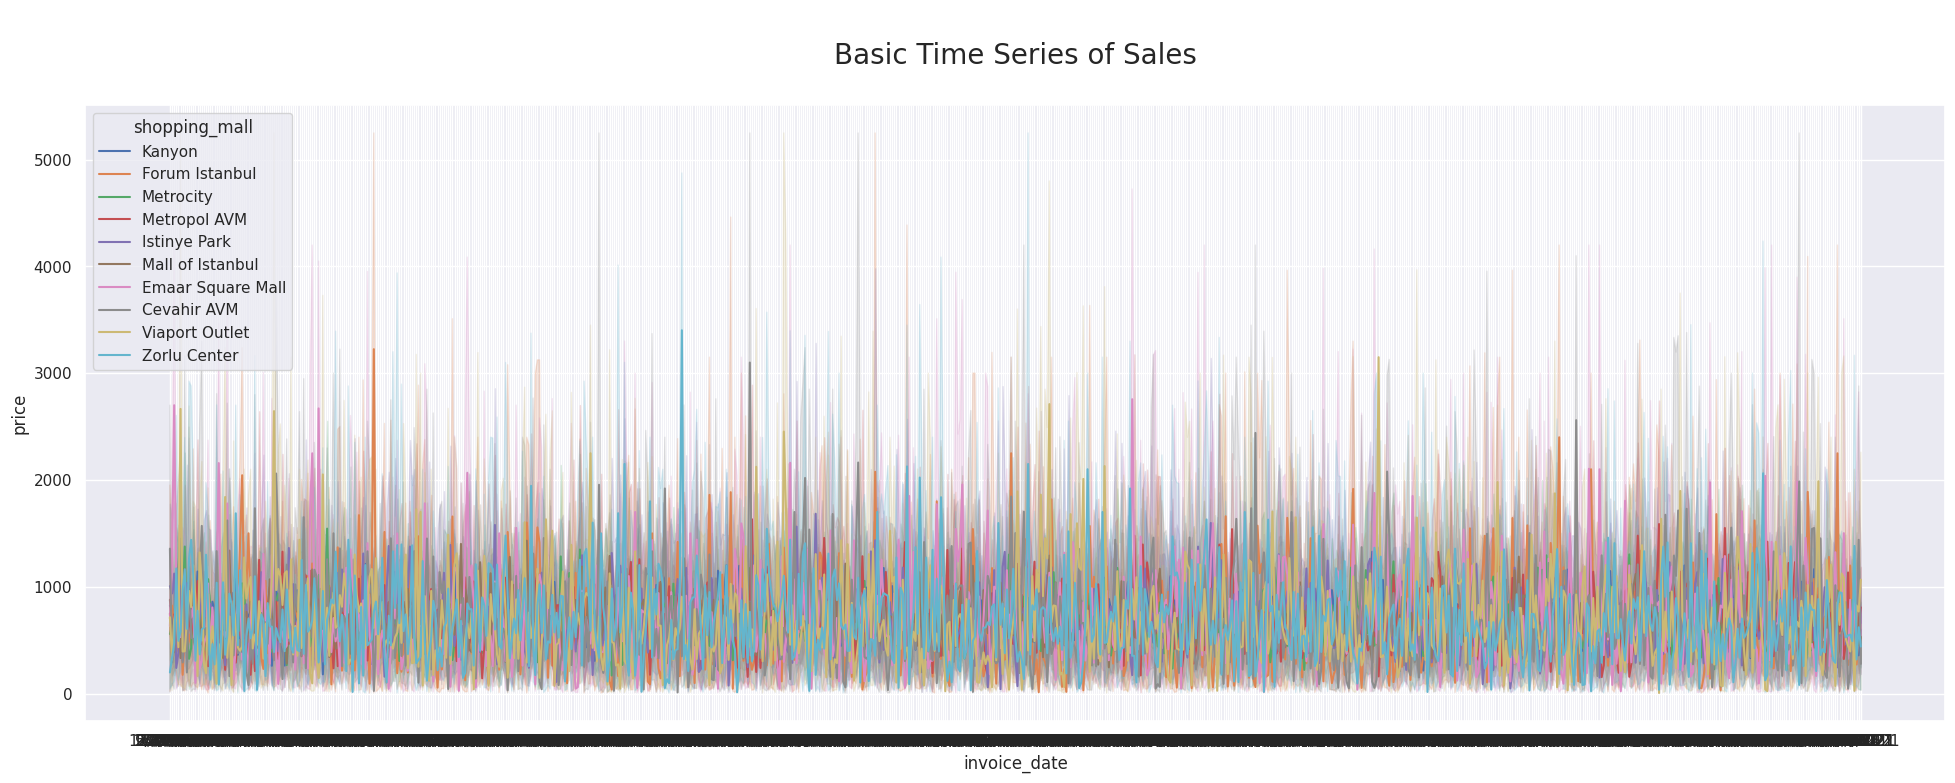

In [8]:
sns.set(rc={'figure.figsize':(24,8)})
ax=sns.lineplot(data=train,x='invoice_date',y='price',hue='shopping_mall')
ax.axes.set_title("\nBasic Time Series of Sales\n",fontsize=20)
print(ax)

Pattern Recognition - Trend

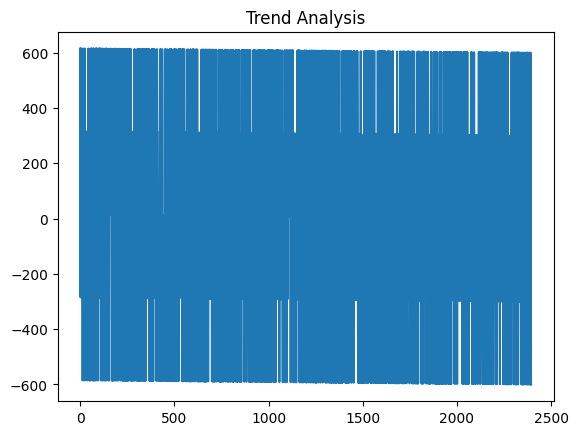

In [9]:
from scipy import signal
df = train[(train['payment_method']=='Credit Card') & (train['category']=='Clothing')& (train['shopping_mall']=='Kanyon')]
detrended = signal.detrend(df.price)
plt.plot(detrended)
plt.title('Trend Analysis')
plt.show()

Seasonality

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2395 entries, 0 to 99391
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      2395 non-null   object 
 1   customer_id     2395 non-null   object 
 2   gender          2395 non-null   object 
 3   age             2395 non-null   int64  
 4   category        2395 non-null   object 
 5   quantity        2395 non-null   int64  
 6   price           2395 non-null   float64
 7   payment_method  2395 non-null   object 
 8   invoice_date    2395 non-null   object 
 9   shopping_mall   2395 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 205.8+ KB


Autocorrelation

[]

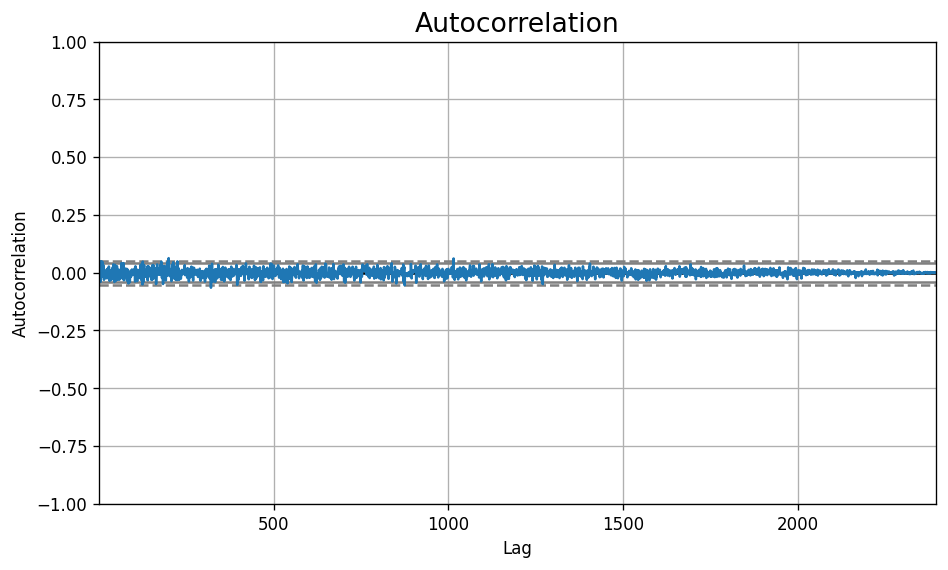

In [17]:
from pandas.plotting import autocorrelation_plot
df = train[(train['payment_method']=='Credit Card') & (train['category']=='Clothing')& (train['shopping_mall']=='Kanyon')]
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.price.tolist())
plt.title('Autocorrelation', fontsize=16)
plt.plot()

Stationarity

In [19]:
df = train[(train['payment_method']=='Credit Card') & (train['category']=='Clothing')& (train['shopping_mall']=='Kanyon')]

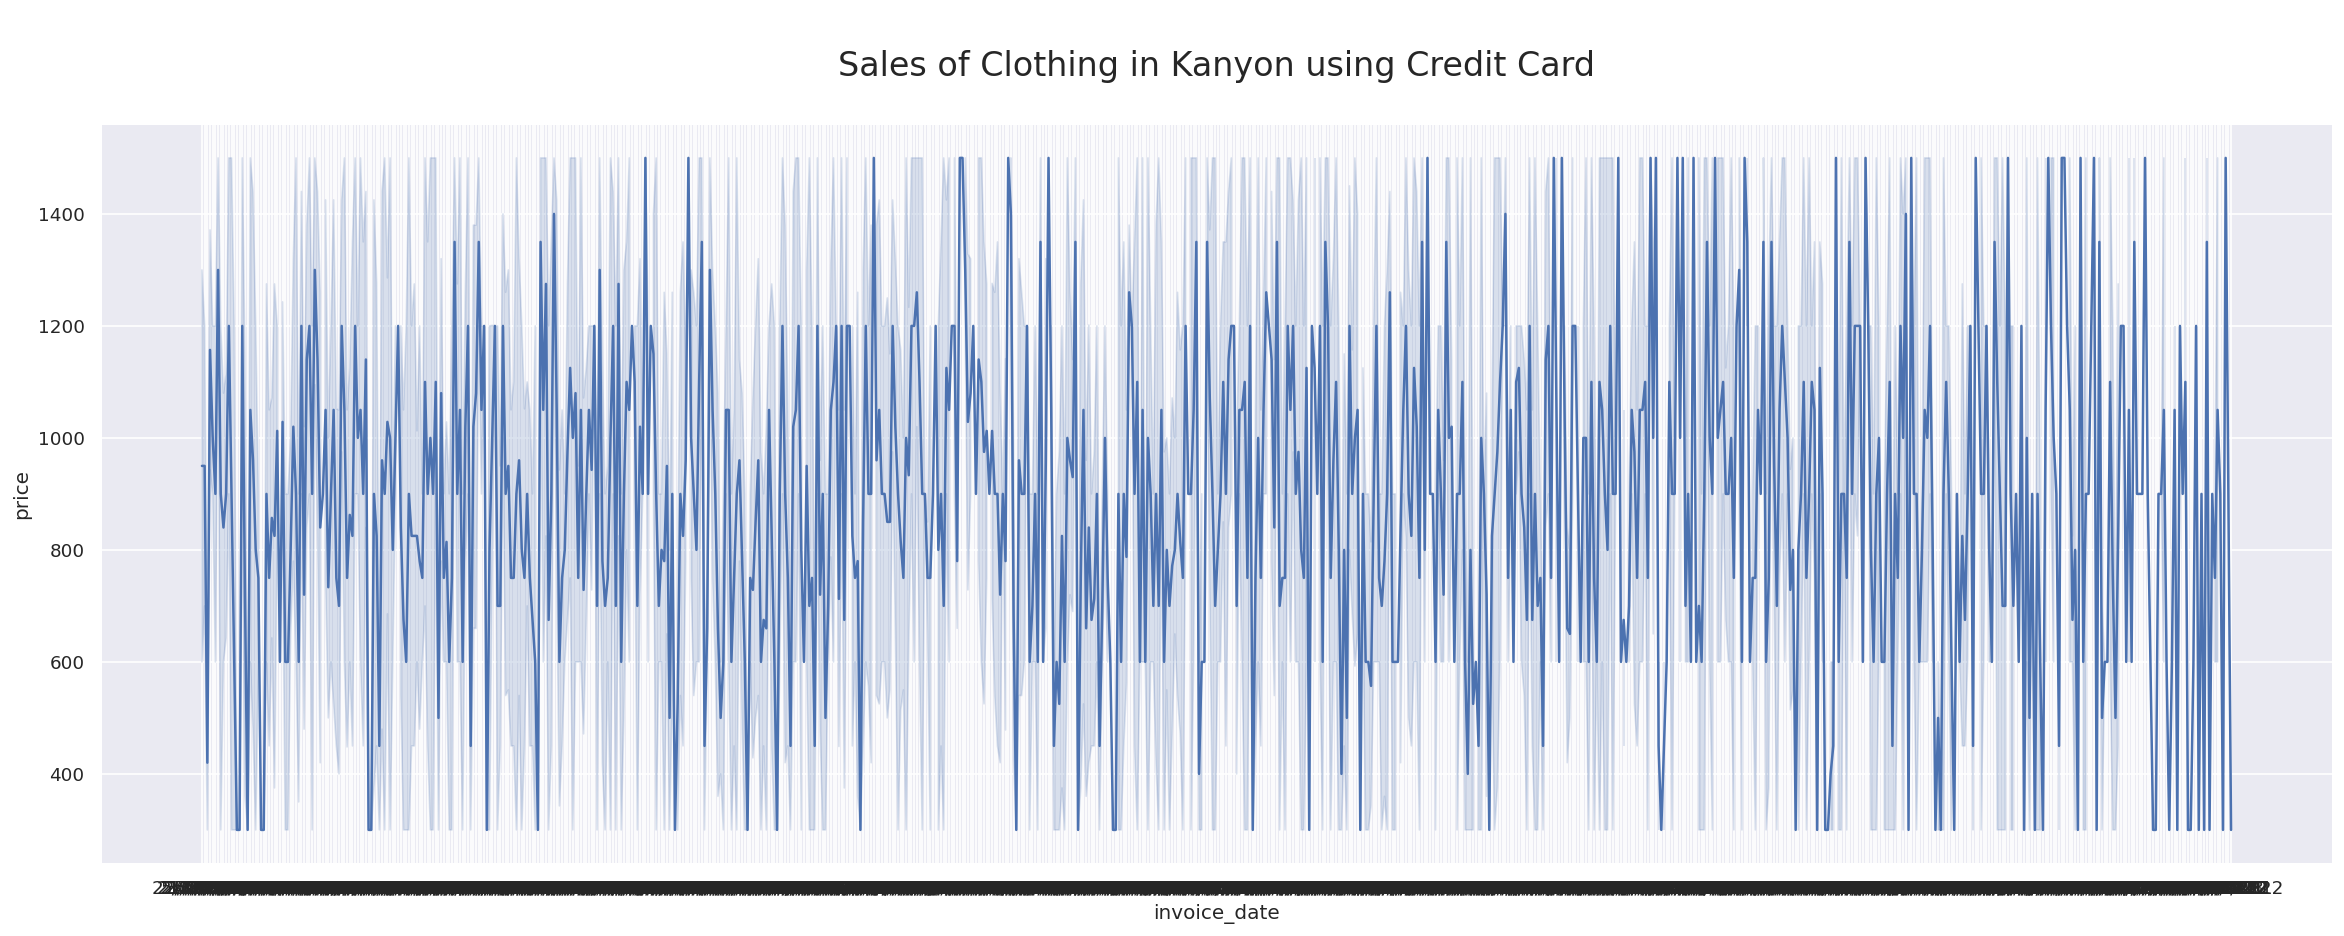

In [21]:
sns.set(rc={'figure.figsize':(24,8)})
ax=sns.lineplot(data=df,x='invoice_date',y='price')
ax.axes.set_title("\nSales of Clothing in Kanyon using Credit Card\n",fontsize=20);

In [27]:
#Augmented Dickey Fuller Test

from statsmodels.tsa.stattools import adfuller
result = adfuller(df.price.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -19.677600731081167
p-value: 0.0
Critial Values:
   1%, -3.433090201041693
Critial Values:
   5%, -2.862750581542575
Critial Values:
   10%, -2.567414443618994


In [25]:
#Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)

from statsmodels.tsa.stattools import kpss
result = kpss(df.price.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}');


KPSS Statistic: 0.071511
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


<ipython-input-25-7859e4726d24>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(df.price.values, regression='c')


Autocorrelation and Partial Autocorrelation

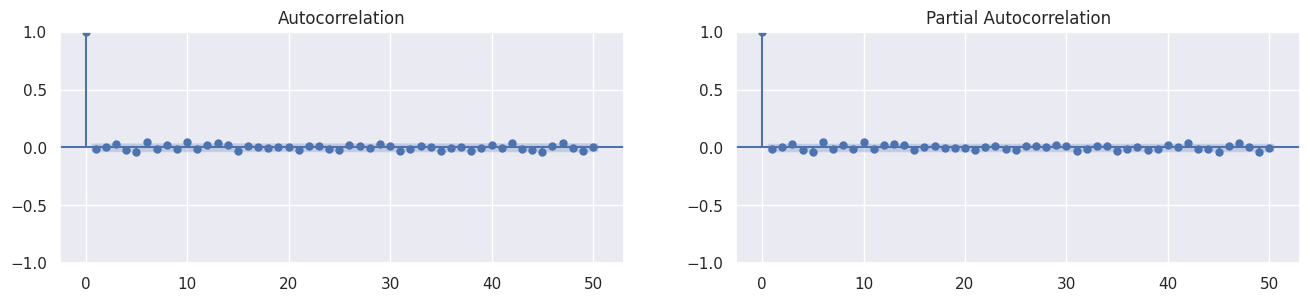

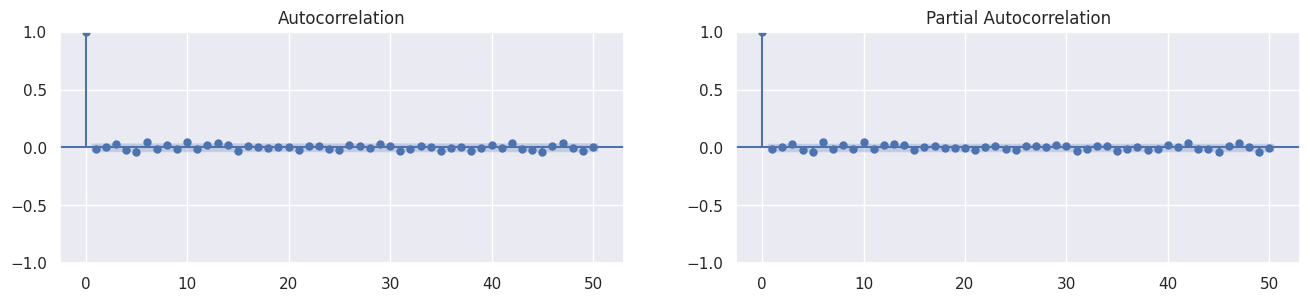

In [28]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = train[(train['payment_method']=='Credit Card') & (train['category']=='Clothing')& (train['shopping_mall']=='Kanyon')]

df['value']=df['price']
acf_50 = acf(df.value, nlags=50)
pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])

Lag Plots

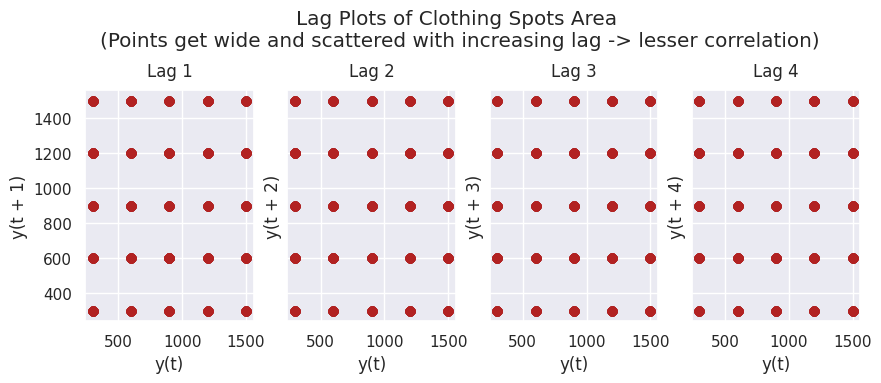

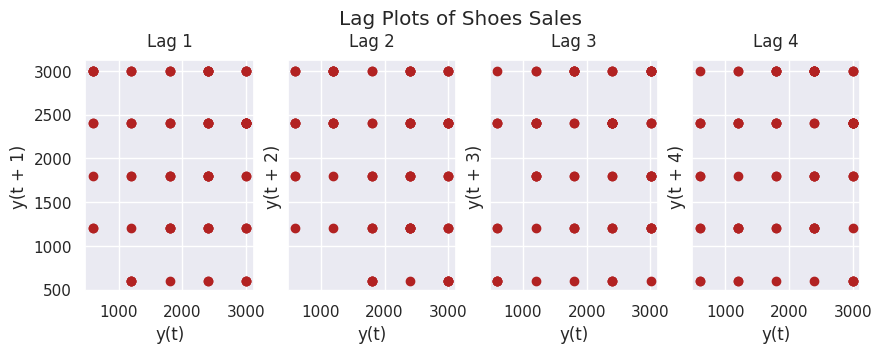

In [31]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})


ss = train[(train['payment_method']=='Credit Card')&(train['category']=='Clothing')&(train['shopping_mall']=='Kanyon')]
ss['value']=ss['price']
a10 = train[(train['payment_method']=='Debit Card')&(train['category']=='Shoes')&(train['shopping_mall']=='Forum Istanbul')]
a10['value']=a10['price']


fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Clothing Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Shoes Sales', y=1.05)
plt.show()

Smoothing

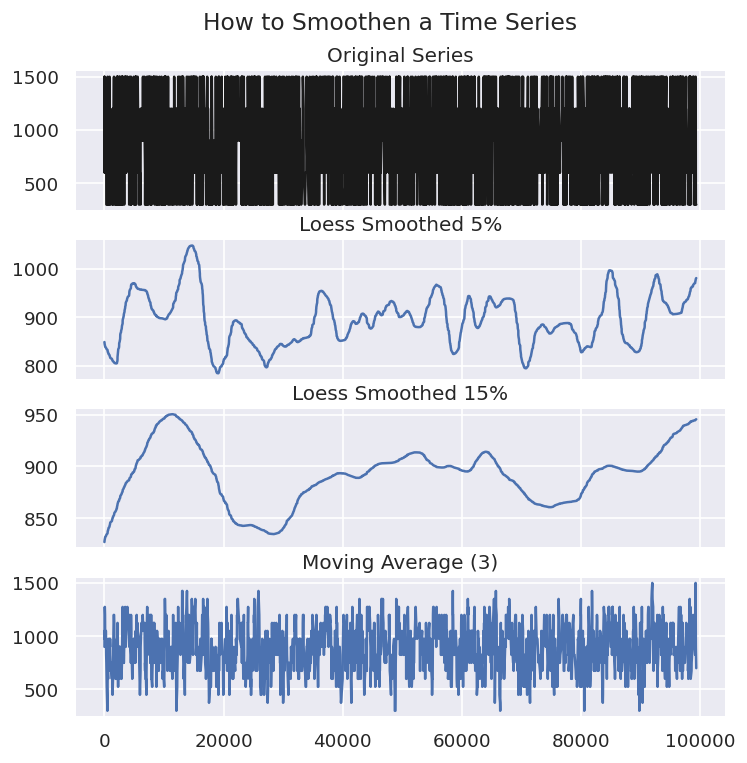

In [33]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

df = train[(train['payment_method']=='Credit Card') & (train['category']=='Clothing')& (train['shopping_mall']=='Kanyon')]
df['value']=df['price']

df_orig=df.copy()

df_ma = df_orig.value.rolling(3, center=True, closed='both').mean()


df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

ARIMA Model

In [8]:
df = train[(train['payment_method']=='Credit Card') & (train['category']=='Clothing')& (train['shopping_mall']=='Kanyon')]
series=pd.DataFrame()
series['value']=df['price']
series=series.set_index(df['invoice_date'])
series

,value
invoice_date,
2022-08-05,1500.40
2021-08-22,600.16
2022-06-03,600.16
2022-06-21,1500.40
2021-04-21,1200.32
...,...
2021-03-08,1500.40
2022-02-18,1500.40
2021-01-29,1500.40


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                 2395
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -18049.322
Date:                Wed, 16 Apr 2025   AIC                          36110.644
Time:                        15:39:12   BIC                          36145.329
Sample:                             0   HQIC                         36123.264
                               - 2395                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8425      0.021    -41.033      0.000      -0.883      -0.802
ar.L2         -0.6760      0.026    -26.368      0.000      -0.726      -0.626
ar.L3         -0.4848      0.027    -17.742      0.0

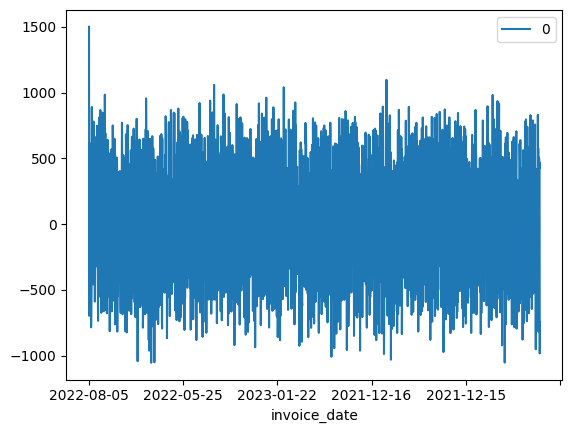

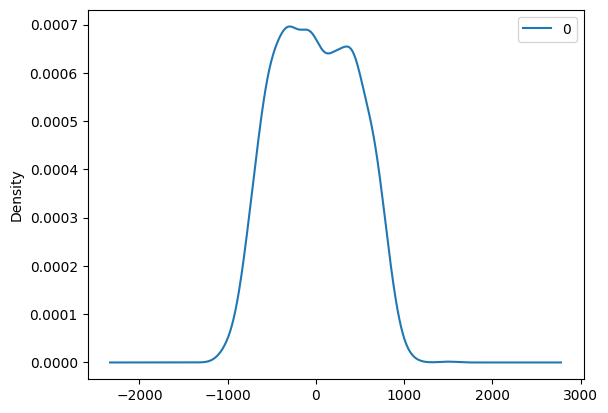

                 0
count  2395.000000
mean      0.223788
std     456.137171
min   -1054.836973
25%    -369.852926
50%     -15.466599
75%     380.842586
max    1500.400000


In [9]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA (series, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print (residuals.describe())

SARIMA Model

                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                 2395
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -17713.316
Date:                            Wed, 16 Apr 2025   AIC                          35436.632
Time:                                    15:42:11   BIC                          35465.481
Sample:                                         0   HQIC                         35447.134
                                           - 2395                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0157      0.021     -0.755      0.450      -0.056       0.025
ma.L1         -1.0000      0.630   

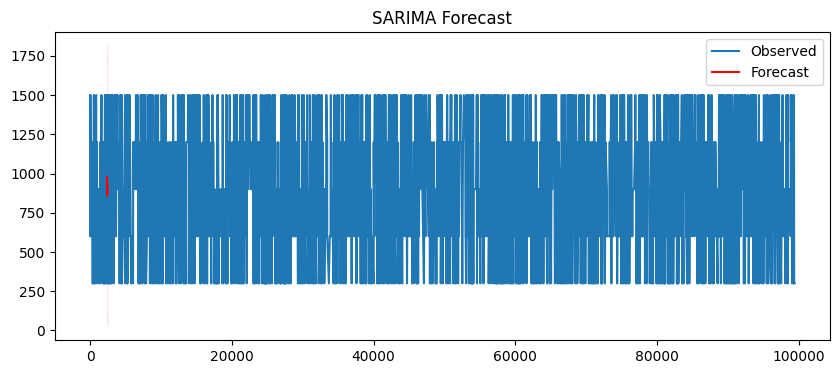

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

df['value']=df['price']

model = SARIMAX(df['value'],
                order=(1, 1, 1),           # ARIMA part
                seasonal_order=(1, 1, 1, 12),  # Seasonal part
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)
print(results.summary())
#forecast next 12 steps
forecast = results.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

#Plot SARIMA
ax = df['value'].plot(label='Observed', figsize=(10, 4))
forecast.predicted_mean.plot(ax=ax, label='Forecast', color='r')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
ax.set_title('SARIMA Forecast')
plt.legend()
plt.show()

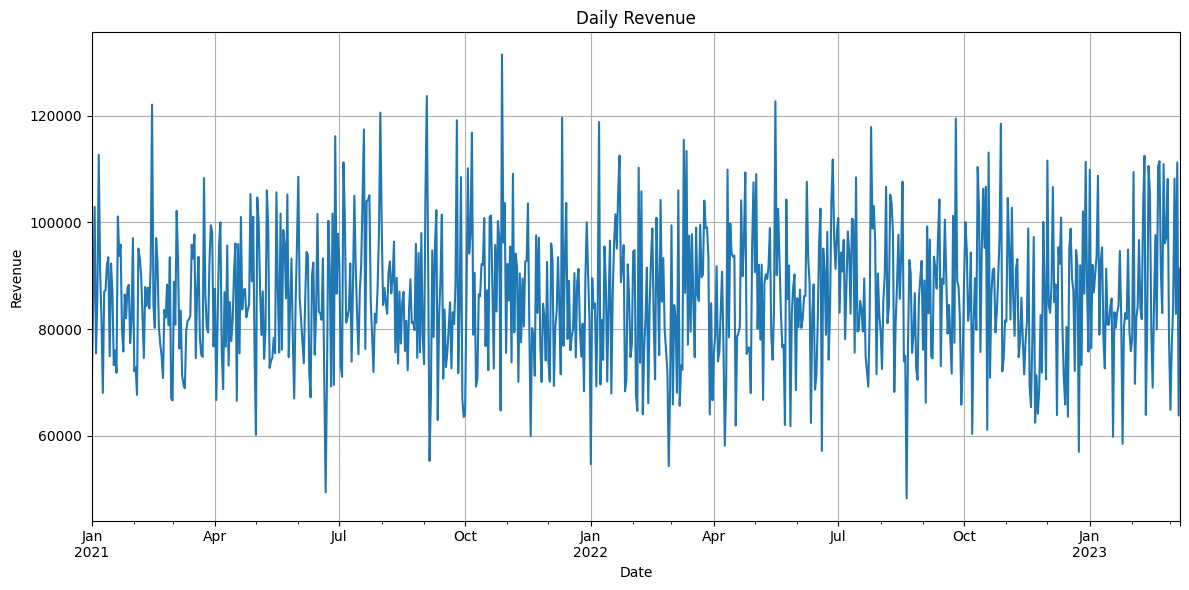

Predicted revenue for Jan 1, 2024: 100385.20


In [1]:
#SARIMA and forecasting
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime

# Load the dataset
df = pd.read_csv("customer_shopping_data.csv")

# Convert 'invoice_date' to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

# Group by date and sum the prices
daily_revenue = df.groupby('invoice_date')['price'].sum()

# Ensure daily frequency and fill missing dates with 0
daily_revenue = daily_revenue.asfreq('D').fillna(0)

# Plot the time series
daily_revenue.plot(title="Daily Revenue", figsize=(12, 6))
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

# Define SARIMA parameters and fit the model
model = SARIMAX(daily_revenue, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
results = model.fit(disp=False)

# Forecast up to January 1, 2024
last_date = daily_revenue.index.max()
forecast_days = (datetime(2024, 1, 1) - last_date).days
forecast = results.get_forecast(steps=forecast_days)
forecast_mean = forecast.predicted_mean

# Get prediction for January 1, 2024
predicted_value = forecast_mean.get(datetime(2024, 1, 1), None)
print(f"Predicted revenue for Jan 1, 2024: {predicted_value:.2f}")
